## Question:

> Of the top 100 world ranked universities (as of 2015), does ranked quality of education at the top 25 result in higher alumni employment than the the bottom 25 universities?

## Data Definitions:

>__World Rank:__ 7 indicators make up a university's rank: quality of education, alumni employment, quality of faculty, research output, quality publications, influence, citations

The two indicators looked at in this project are:

>__Quality of Education:__ measured by the number of a university's alumni who have won major international awards, prizes, and medals relative to the university's size (15%) 

>__Alumni Employment:__ measured by the number of a university's alumni who have held CEO positions at the world's top companies relative to the university's size (15%) 

## References:
*  https://www.kaggle.com/mylesoneill/world-university-rankings <br>
*  https://cwur.org/methodology/world-university-rankings.php

## Initial Thoughts/Brainstorming
The definition of both indicators is fairly narrow. Quality of Education is based on external recognitions, and Alumni Employment looks at *very* specific types of employment -- CEOs at "top" companies; top companies is also not defined in the data set. Quality of Education could be defined by numerous other parameters not used here, like faculty involvement, extracurriculars, etc. Alumni employment is very specific and doesn't include more "standard" post-college employment in the ranking. Given that, the results of this project can't really be applied to universities beyond this dataset.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#this is a variable to hold the csv data after it's read
university_db = pd.read_csv('UniversityRanking.csv')

In [3]:
# this creates the SQL database
university_db.to_sql('university_table', sqlite3.connect('university.db'), if_exists = 'replace')

## Basic World Rankings List

First, we'll start with a basic listing of the Top 25 universities and the Bottom 25 universities.

In [4]:
# this is a variable for the SQL connection
connection = sqlite3.connect('university.db')

# selecting top 25 universities and saving them to a variable
unitop25_df = pd.read_sql_query('SELECT world_rank AS "World Rank", institution AS "Institution", alumni_employment AS "Alumni Employment", quality_of_education AS "Quality of Education" FROM university_table WHERE world_rank < 26 AND year = 2015 ORDER BY world_rank', connection)
unitop25_df

,World Rank,Institution,Alumni Employment,Quality of Education
0,1,Harvard University,1,1
1,2,Stanford University,2,9
2,3,Massachusetts Institute of Technology,11,3
3,4,University of Cambridge,10,2
4,5,University of Oxford,13,7
5,6,Columbia University,6,13
6,7,"University of California, Berkeley",21,5
7,8,University of Chicago,14,11
8,9,Princeton University,15,4
9,10,Cornell University,18,12


In [5]:
# selecting bottom 25 universities and saving them to a variable
unibottom25_df = pd.read_sql_query('SELECT world_rank AS "World Rank", institution AS "Institution", alumni_employment AS "Alumni Employment", quality_of_education AS "Quality of Education" FROM university_table WHERE world_rank BETWEEN 75 AND 100 AND year = 2015 ORDER BY world_rank', connection)
unibottom25_df

,World Rank,Institution,Alumni Employment,Quality of Education
0,75,University of Texas Southwestern Medical Center,567,59
1,76,Ruprecht Karl University of Heidelberg,402,38
2,77,University of Notre Dame,24,221
3,78,Tsinghua University,73,309
4,79,Ludwig Maximilian University of Munich,129,42
5,80,Georgia Institute of Technology,60,135
6,81,University of Rochester,53,72
7,82,Katholieke Universiteit Leuven,202,367
8,83,Brown University,43,64
9,84,Emory University,146,367


## Individual Comparison

Note: For both indicators, the closer to 0 is a "better" score.

Initially I compared the top and bottom universities via line chart. The first thing to notice is roughly the top 15 universities run one-to-one in terms of highest employment and highest rank (minus one outlier in California Institute of Technology).

After the 20th ranked university, the comparison diverges regularly.

For the bottom 25, employment and rank don't seem related at all and variable.


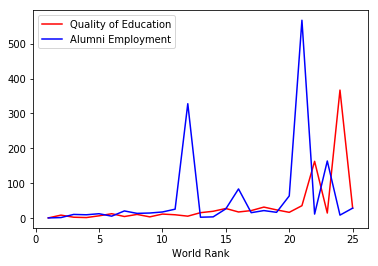

In [6]:
ax = plt.gca()

unitop25_df.plot(x='World Rank', y='Quality of Education', color='red', linestyle='solid', ax=ax)
unitop25_df.plot(x='World Rank', y='Alumni Employment', color='blue', linestyle='solid', ax=ax)

plt.show()

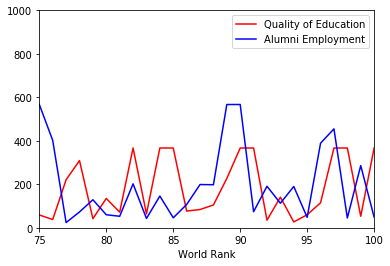

In [7]:
ax = plt.gca()

ax.set_xlim ([75, 100])
ax.set_ylim([0, 1000])

unibottom25_df.plot(x='World Rank', y='Quality of Education', color='red', linestyle='solid', ax=ax)
unibottom25_df.plot(x='World Rank', y='Alumni Employment', color='blue', linestyle='solid', ax=ax)

plt.show()

In [8]:
plt.scatter(unitop25_df.values(), unibottom25_df.values())
plt.show()

TypeError: 'numpy.ndarray' object is not callable